# Importing libraries

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing dataset

In [75]:
# Specify the encoding as 'ISO-8859-1' (latin1)
df = pd.read_csv("customer_booking.csv", encoding='ISO-8859-1')

# Now you can work with the DataFrame 'df'
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


<h1 style="color: purple;">Data Preprocessing</h1>

### Shape of the dataset

In [76]:
df.shape

(50000, 14)

### Information regarding dataset

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

### Checking duplicate values

In [78]:
# Is there any duplicate value in dataset?
df.duplicated().sum()

719

In [79]:
# Dropping duplicate values
df = df.drop_duplicates()

In [80]:
# Checking again is there any duplicate value in dataset?
df.duplicated().sum()

0

In [81]:
# Shape of dataset after dropping duplicate values
df.shape

(49281, 14)

## Handling missing values

In [82]:
# Null values in dataset?
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

### Value counts of all the features

In [83]:
df['num_passengers'].value_counts()

1    30879
2    12669
3     2882
4     1767
5      544
6      281
7      107
8       88
9       64
Name: num_passengers, dtype: int64

In [84]:
df['sales_channel'].value_counts()

Internet    43917
Mobile       5364
Name: sales_channel, dtype: int64

In [85]:
df['trip_type'].value_counts()

RoundTrip     48779
OneWay          386
CircleTrip      116
Name: trip_type, dtype: int64

In [86]:
df['purchase_lead'].value_counts()

1      681
2      666
6      649
7      636
5      611
      ... 
463      1
460      1
453      1
584      1
867      1
Name: purchase_lead, Length: 470, dtype: int64

In [87]:
df['length_of_stay'].value_counts()

6      7611
5      7151
4      5568
3      2798
17     1823
       ... 
242       1
392       1
431       1
513       1
329       1
Name: length_of_stay, Length: 335, dtype: int64

In [88]:
df['flight_hour'].value_counts()

8     3125
12    3114
9     3097
7     3080
11    3071
10    3050
13    3046
6     3010
5     2817
4     2786
14    2783
3     2616
2     2596
15    2201
1     2071
16    1536
0     1501
23     975
17     848
22     573
18     430
21     386
19     294
20     275
Name: flight_hour, dtype: int64

In [89]:
df['flight_day'].value_counts()

Mon    7988
Wed    7562
Tue    7558
Thu    7323
Fri    6685
Sun    6442
Sat    5723
Name: flight_day, dtype: int64

In [90]:
df['route'].value_counts()

AKLKUL    2620
PENTPE     912
MELSGN     833
ICNSIN     793
DMKKIX     729
          ... 
AKLHGH       1
JEDPDG       1
JEDPEN       1
DACPEK       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

In [91]:
df['booking_origin'].value_counts()

Australia               17691
Malaysia                 7055
South Korea              4502
Japan                    3819
China                    3284
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

In [92]:
df['wants_extra_baggage'].value_counts()

1    32931
0    16350
Name: wants_extra_baggage, dtype: int64

In [93]:
df['wants_preferred_seat'].value_counts()

0    34712
1    14569
Name: wants_preferred_seat, dtype: int64

In [94]:
df['wants_in_flight_meals'].value_counts()

0    28256
1    21025
Name: wants_in_flight_meals, dtype: int64

In [95]:
df['flight_duration'].value_counts()

8.83    14339
8.58     6892
5.62     5464
6.62     4658
7.00     3314
7.57     2785
4.67     2699
6.42     1708
5.33     1506
4.75     1246
6.33     1178
8.67      787
5.52      664
5.07      501
4.72      486
8.15      299
5.00      237
7.42      221
4.83      145
5.13      116
9.50       36
Name: flight_duration, dtype: int64

In [96]:
df['booking_complete'].value_counts()

0    41890
1     7391
Name: booking_complete, dtype: int64

### Mutual Information

In [97]:
# Remove the 'booking_complete' column from the DataFrame and store it in 'y'.
X = df.drop('booking_complete', axis=1)
y = df.booking_complete

# Changing object dtype to int dtype for certain columns.
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

In [98]:
X

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,0,0,262,19,7,0,0,0,1,0,0,5.52
1,1,0,0,112,20,3,0,0,0,0,0,0,5.52
2,2,0,0,243,22,17,1,0,1,1,1,0,5.52
3,1,0,0,96,31,4,0,0,0,0,0,1,5.52
4,2,0,0,68,22,15,1,0,1,1,0,1,5.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,0,27,6,9,0,638,36,1,0,1,5.62
49996,1,0,0,111,6,4,4,638,36,0,0,0,5.62
49997,1,0,0,24,6,22,0,638,36,0,0,1,5.62
49998,1,0,0,15,6,11,3,638,36,1,0,1,5.62


In [99]:
X.dtypes

num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                      int64
booking_origin             int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
dtype: object

In [100]:
# Import the mutual_info_classif function from scikit-learn
from sklearn.feature_selection import mutual_info_classif

# Compute MI scores for each feature in X with respect to the target variable y
mi_scores = mutual_info_classif(X, y)

# Create a pandas Series with feature names as the index and MI scores as values
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)

# Sort the Series in descending order of MI scores
mi_scores = mi_scores.sort_values(ascending=False)

# Display the MI scores for the features
mi_scores

route                    0.053138
booking_origin           0.048543
flight_duration          0.018080
length_of_stay           0.006542
wants_extra_baggage      0.005969
purchase_lead            0.004389
wants_in_flight_meals    0.004263
num_passengers           0.003012
flight_hour              0.002784
flight_day               0.002065
wants_preferred_seat     0.000411
trip_type                0.000386
sales_channel            0.000000
Name: MI Scores, dtype: float64

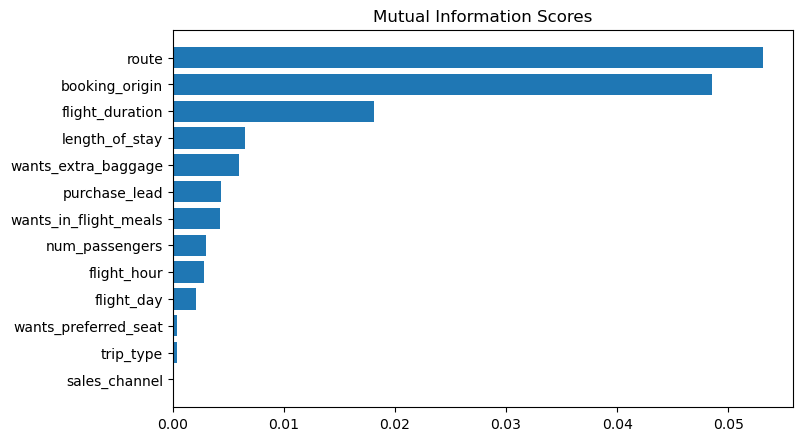

In [101]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

We can see

1) route
2) booking_origin
3) flight_duration
4) wants_extra_baggage
5) length_of_stay
6) wants_extra_baggage

are the top 6 features which have most impact on booking_complete feature

<h1 style="color: purple;">Data Modelling</h1>

# Random forest classifier with all the input features

In [102]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 85.04%


# Random forest classifier with top 6 input features

In [104]:
# Define the input features
selected_features = ['route', 'booking_origin', 'flight_duration', 'wants_extra_baggage', 'length_of_stay', 'wants_extra_baggage']

# Create the feature matrix X with only the selected features
X = df[selected_features]

# Convert categorical columns to integers (if necessary)
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# Define the target variable
y = df['booking_complete']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

C:\Users\dell\AppData\Local\Temp\ipykernel_11864\2189676225.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[colname], _ = X[colname].factorize()
C:\Users\dell\AppData\Local\Temp\ipykernel_11864\2189676225.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[colname], _ = X[colname].factorize()


Accuracy: 82.92%


# Random forest classifier with top 8 input features

In [106]:
# Define the input features
selected_features = ['route', 'booking_origin', 'flight_duration', 'wants_extra_baggage', 'length_of_stay', 'wants_extra_baggage', 'purchase_lead', 'wants_in_flight_meals']

# Create the feature matrix X with only the selected features
X = df[selected_features]

# Convert categorical columns to integers (if necessary)
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# Define the target variable
y = df['booking_complete']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

C:\Users\dell\AppData\Local\Temp\ipykernel_11864\2892933310.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[colname], _ = X[colname].factorize()
C:\Users\dell\AppData\Local\Temp\ipykernel_11864\2892933310.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[colname], _ = X[colname].factorize()


Accuracy: 83.94%
